In [3]:
# %%
# From Eq. 6 of https://arxiv.org/pdf/0911.5627v1.pdf
from matplotlib import pyplot as plt
import numpy as np
def lambda_J(J,beta_xy, sigma_x1, sigma_x2):
    return (beta_xy * np.sqrt(sigma_x1**2 + sigma_x2**2)
            *np.i0(J*beta_xy/(2*sigma_x2**2))
            /(sigma_x1**2 * sigma_x2)
            *np.exp(-0.5*J*beta_xy*(2/sigma_x1**2+1/sigma_x2**2))
            )

def rho_J(J, beta_xy, sigma_x1):
    epsilon_x = sigma_x1**2 / beta_xy
    return (1*np.exp(-1*J/epsilon_x)/(epsilon_x)
            )


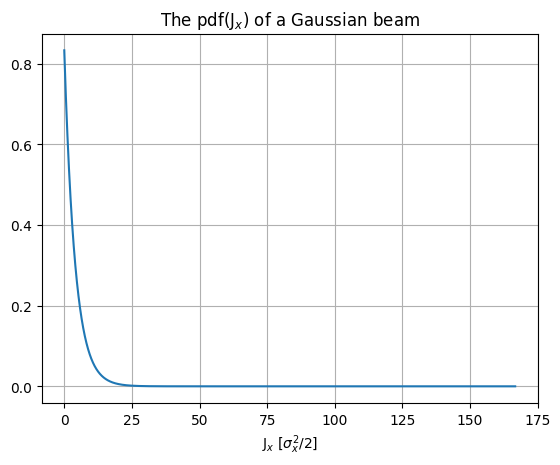

In [6]:
beta_xy = 0.5
J = np.linspace(0,50,10000)
sigma_x1 = np.sqrt(1.2)*np.sqrt(beta_xy)
sigma_x2 = sigma_x1
unit_J = sigma_x1**2/2
np.trapezoid(lambda_J(J,beta_xy, sigma_x1, sigma_x2), J)

plt.figure()
plt.title('The pdf(J$_x$) of a Gaussian beam')
plt.plot(J/unit_J, rho_J(J,beta_xy, sigma_x1))
plt.xlabel('J$_x$ [$\\sigma_x^2$/2]')
plt.grid(True)

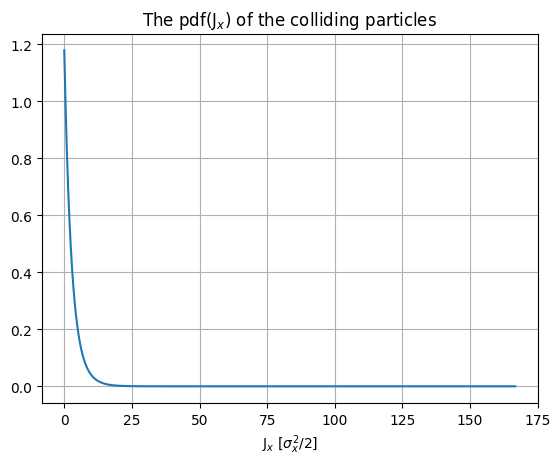

In [8]:
plt.figure()
plt.title('The pdf(J$_x$) of the colliding particles')
plt.xlabel('J$_x$ [$\\sigma_x^2$/2]')
plt.plot(J/unit_J, lambda_J(J,beta_xy, sigma_x1, sigma_x2))
plt.grid(True)

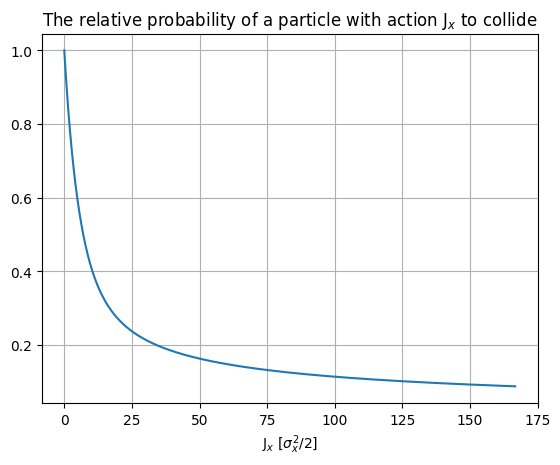

In [12]:
plt.figure()
aux = lambda_J(J,beta_xy, sigma_x1, sigma_x2)/rho_J(J,beta_xy, sigma_x1)
plt.plot(J/unit_J, aux/aux[0] )
plt.title('The relative probability of a particle with action J$_x$ to collide')
plt.xlabel('J$_x$ [$\\sigma_x^2$/2]')
plt.grid(True)

(0.0, 1.1)

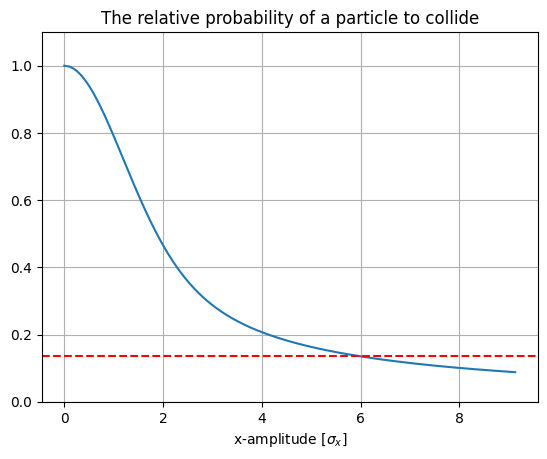

In [11]:
# The particle with a amplitude = 6 $\sigma_x$ has 0.135 (more that 7 times less) the probability
# to collide of the particle with amplitude = 0.
plt.figure()
aux = lambda_J(J,beta_xy, sigma_x1, sigma_x2)/rho_J(J,beta_xy, sigma_x1)
plt.plot(np.sqrt(J*2)/sigma_x1*np.sqrt(beta_xy), aux/aux[0] )
plt.title('The relative probability of a particle to collide')
plt.xlabel('x-amplitude [$\\sigma_x$]')
plt.grid(True)
plt.axhline(.135, color='r', linestyle='--')
plt.ylim(0,1.1)